In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline
import yfinance as yf

In [3]:
stock = 'RELIANCE.NS'
rel_data = yf.download(stock,start= '2022-08-01',end= '2023-01-08')

[*********************100%%**********************]  1 of 1 completed


In [4]:
rel_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-01,2519.149902,2587.750000,2507.600098,2574.850098,2558.084961,7245568
2022-08-02,2572.500000,2607.800049,2561.550049,2584.649902,2567.821045,6423115
2022-08-03,2600.000000,2610.000000,2567.449951,2606.350098,2589.379883,6576824
2022-08-04,2610.000000,2617.750000,2535.000000,2571.899902,2555.153809,6676577
2022-08-05,2576.000000,2578.800049,2526.949951,2534.000000,2517.500732,6434433


In [5]:
rel_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,109.000000,109.000000,109.000000,109.000000,109.000000,1.090000e+02
mean,2553.334860,2577.072469,2530.771572,2553.416985,2543.645158,4.927572e+06
std,89.979489,87.451407,89.501494,90.572220,89.902002,2.088754e+06
min,2311.000000,2367.500000,2311.000000,2325.300049,2317.114990,1.555270e+06
25%,2514.750000,2536.399902,2492.250000,2502.850098,2494.040039,3.446291e+06
50%,2575.000000,2596.550049,2550.699951,2571.899902,2560.256104,4.333225e+06
75%,2610.000000,2629.699951,2582.100098,2609.100098,2599.916016,5.774775e+06
max,2741.800049,2755.000000,2716.000000,2731.350098,2721.735596,1.454993e+07


In [6]:
rel_data.shape

(109, 6)

In [7]:
rel_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
rel_data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.975324,0.975711,0.946447,0.946518,-0.065796
High,0.975324,1.000000,0.966035,0.981370,0.981386,0.044175
Low,0.975711,0.966035,1.000000,0.965422,0.965626,-0.135186
Close,0.946447,0.981370,0.965422,1.000000,0.999667,0.001181
Adj Close,0.946518,0.981386,0.965626,0.999667,1.000000,-0.000486
Volume,-0.065796,0.044175,-0.135186,0.001181,-0.000486,1.000000


In [9]:
rel_data['Returns']= rel_data['Adj Close'].pct_change()


In [10]:
rel_data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2022-08-01,2519.149902,2587.750000,2507.600098,2574.850098,2558.084961,7245568,NaN
2022-08-02,2572.500000,2607.800049,2561.550049,2584.649902,2567.821045,6423115,0.003806
2022-08-03,2600.000000,2610.000000,2567.449951,2606.350098,2589.379883,6576824,0.008396
2022-08-04,2610.000000,2617.750000,2535.000000,2571.899902,2555.153809,6676577,-0.013218
2022-08-05,2576.000000,2578.800049,2526.949951,2534.000000,2517.500732,6434433,-0.014736


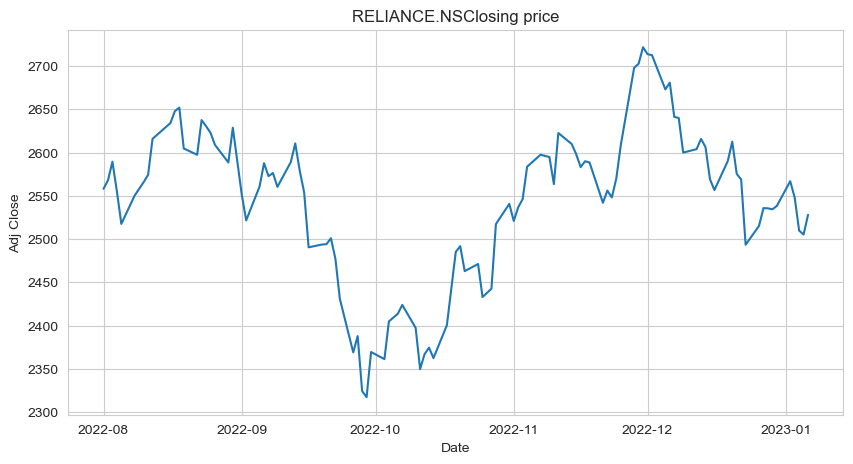

In [11]:
plt.figure(figsize=(10,5))
sns.lineplot(data=rel_data,x='Date',y='Adj Close')
plt.title(f'{stock}Closing price')
plt.show()

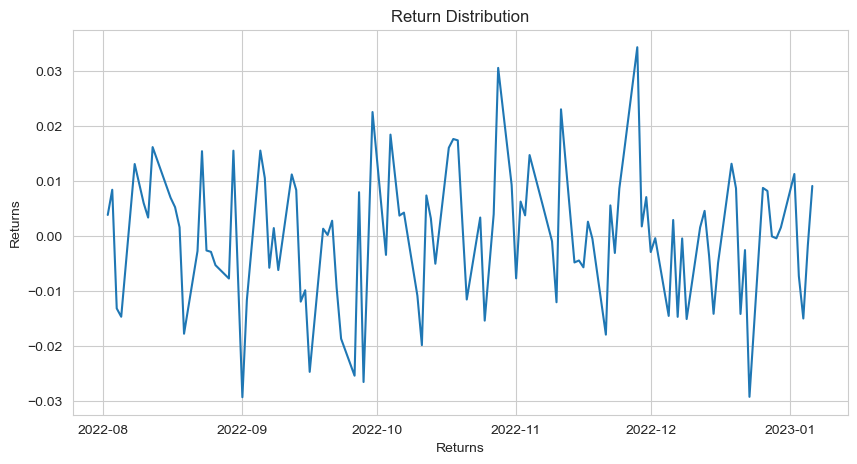

In [12]:
plt.figure(figsize = (10,5))
sns.lineplot(data = rel_data,x='Date',y='Returns')
plt.title('Return Distribution')
plt.xlabel('Returns')
plt.show()

<Axes: xlabel='Date'>

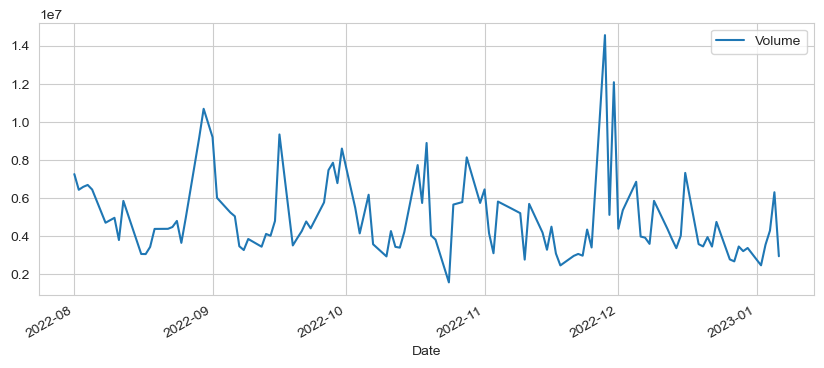

In [13]:
rel_data['Volume'].plot(legend = True,figsize=(10,4))

Stock Market Data Analysis

Stock Market Analysis and Prediction is the project related to Exploratory data analysis(EDA), Data visualization and Predictive analysis using data, provided by The Investors Exchange (IEX). 
We'll be answering the following questions along the way:

What was the change in price of the stock over time?

What was the daily return of the stock on average?

What was the moving average of the various stocks?

What was the correlation between different stocks' closing prices?

What was the correlation between different stocks' daily returns?

How much value do we put at risk by investing in a particular stock?

How can we attempt to predict future stock behavior?

In [14]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas_datareader as pdr
from datetime import datetime

In [74]:
tech_stocks = ['AAPL','GOOG','MSFT','AMZN']

In [17]:
##SETUP END AND START TIME FOR DATALOAD
end =datetime.now()
end

datetime.datetime(2024, 1, 2, 15, 48, 28, 222084)

In [18]:
start = datetime(end.year - 1,end.month,end.day)
start

datetime.datetime(2023, 1, 2, 0, 0)

In [75]:
import os
stock_data=stock_data.reset_index('date')

In [38]:
stock_data.reset_index(inplace=True)

In [76]:
 os.environ["IEX_API_KEY"] = "sk_080f5a2de5d3489c98461cc9b9795664"

In [77]:
for stock in tech_stocks:
      stock_data = pdr.DataReader(stock,'iex',start,end, api_key=os.getenv('IEX_API_KEY'))

In [29]:
 stock_data

,open,high,low,close,volume
date,,,,,
2023-01-03,89.830,91.550,89.0200,89.70,20738457
2023-01-04,91.010,91.240,87.8000,88.71,27046483
2023-01-05,88.070,88.210,86.5600,86.77,23136084
2023-01-06,87.360,88.470,85.5700,88.16,26612628
2023-01-09,89.195,90.830,88.5800,88.80,22996681
...,...,...,...,...,...
2023-12-22,142.130,143.250,142.0550,142.72,18513524
2023-12-26,142.980,143.945,142.5001,142.82,11170066
2023-12-27,142.830,143.320,141.0512,141.44,17288358


In [78]:
for stock in tech_stocks:
      globals()[stock] = pdr.DataReader(stock,'iex',start,end, api_key=os.getenv('IEX_API_KEY'))

In [41]:
AAPL.head()

,open,high,low,close,volume
date,,,,,
2023-01-03,130.280,130.900,124.17,125.07,112117471
2023-01-04,126.890,128.656,125.08,126.36,89113633
2023-01-05,127.130,127.770,124.76,125.02,80962708
2023-01-06,126.010,130.290,124.89,129.62,87754715
2023-01-09,130.465,133.410,129.89,130.15,70790813


In [42]:
AAPL.describe()

,open,high,low,close,volume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,172.256320,173.857204,170.981604,172.548960,5.923304e+07
std,17.530467,17.261068,17.535003,17.331644,1.778221e+07
min,126.010000,127.770000,124.170000,125.020000,2.404834e+07
25%,161.555000,162.387500,160.700250,162.112500,4.781204e+07
50%,175.245000,177.024500,173.840000,175.475000,5.511082e+07
75%,186.805000,188.095000,185.175000,187.330000,6.576682e+07
max,198.020000,199.620000,197.000000,198.110000,1.543573e+08


In [43]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    250 non-null    float64
 1   high    250 non-null    float64
 2   low     250 non-null    float64
 3   close   250 non-null    float64
 4   volume  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7+ KB


In [44]:
AAPL.count()

open      250
high      250
low       250
close     250
volume    250
dtype: int64

#Let's see a historical view of the closing price

<Axes: xlabel='date'>

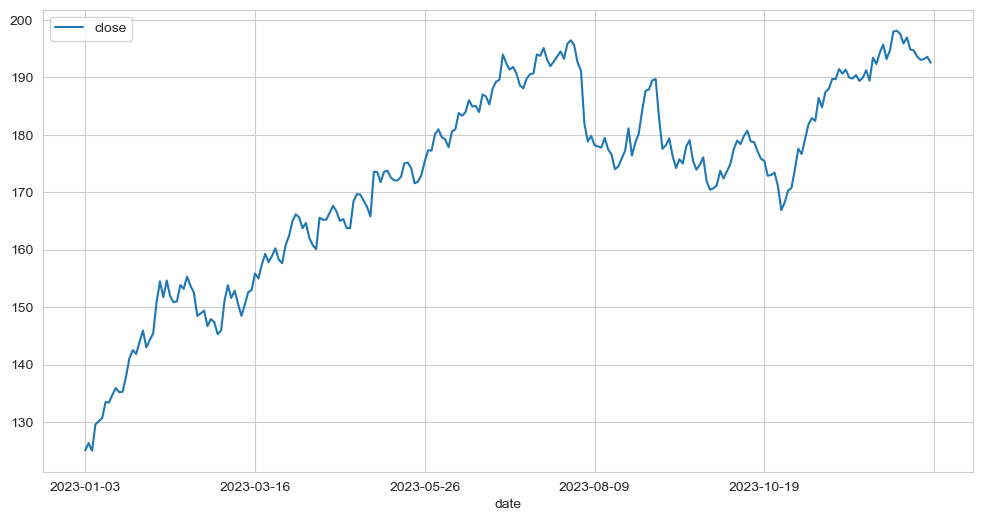

In [45]:
AAPL['close'].plot(legend = True,figsize = (12,6))

##Now let's plot the total volume of stock being traded each day over the past 5 years

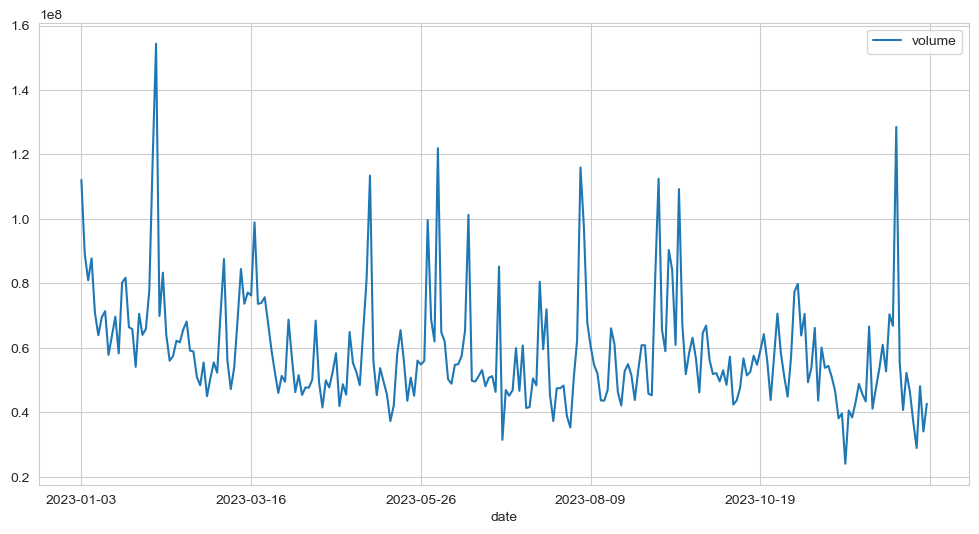

In [46]:
AAPL['volume'].plot(legend = True,figsize = (12,6))
plt.show()

In [47]:
GOOG.head()

,open,high,low,close,volume
date,,,,,
2023-01-03,89.830,91.55,89.02,89.70,20738457
2023-01-04,91.010,91.24,87.80,88.71,27046483
2023-01-05,88.070,88.21,86.56,86.77,23136084
2023-01-06,87.360,88.47,85.57,88.16,26612628
2023-01-09,89.195,90.83,88.58,88.80,22996681


In [48]:
GOOG.describe()

,open,high,low,close,volume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,119.353696,120.839546,118.241268,119.611860,2.556557e+07
std,16.476136,16.425844,16.425003,16.373269,1.085813e+07
min,86.720000,88.210000,85.570000,86.770000,8.828640e+06
25%,105.252500,106.565000,104.262500,105.142500,1.910105e+07
50%,123.955000,125.377500,122.775000,123.965000,2.275789e+07
75%,133.205000,134.472500,132.113750,133.290000,2.834745e+07
max,142.980000,143.945000,142.500100,142.820000,9.779857e+07


<Axes: xlabel='date'>

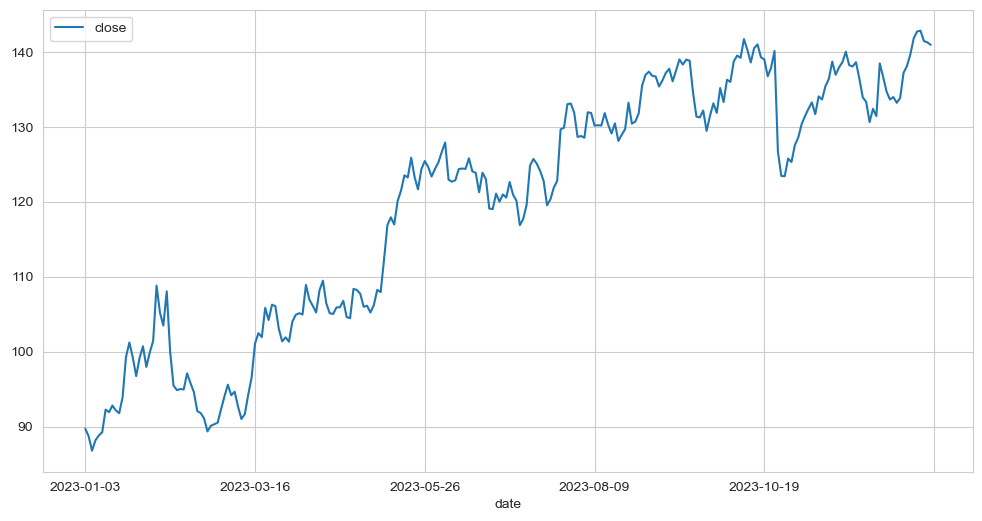

In [49]:
GOOG['close'].plot(legend = True,figsize = (12,6))

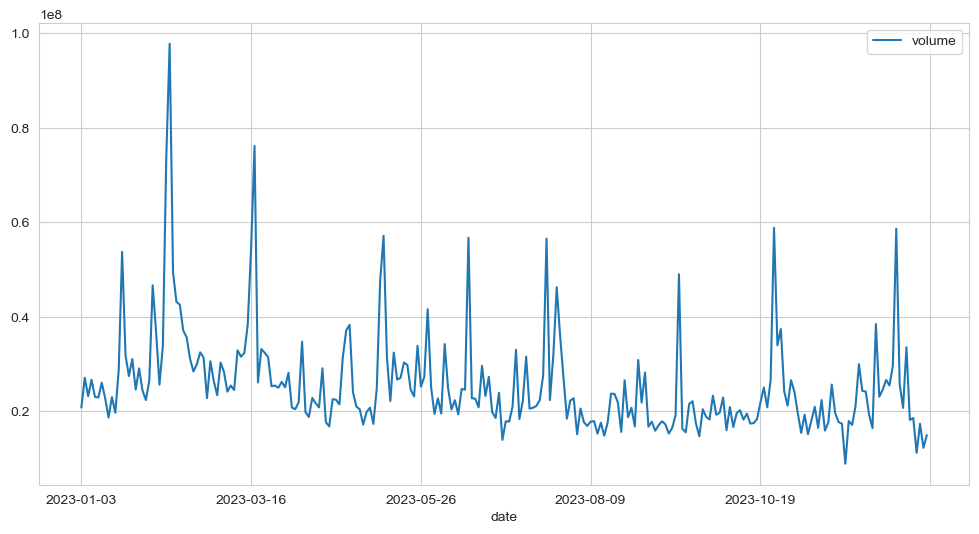

In [50]:
GOOG['volume'].plot(legend = True,figsize = (12,6))
plt.show()

In [79]:
MSFT.head()

,open,high,low,close,volume
date,,,,,
2023-01-03,243.080,245.750,237.40,239.58,25740036
2023-01-04,232.275,232.870,225.96,229.10,50623394
2023-01-05,227.200,227.550,221.76,222.31,39585623
2023-01-06,223.000,225.760,219.35,224.93,43613574
2023-01-09,226.450,231.237,226.41,227.12,27369784


In [81]:
MSFT.describe()

,open,high,low,close,volume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,313.701440,316.770601,310.811846,313.950980,2.768077e+07
std,41.055891,40.987955,40.872105,40.975855,1.064233e+07
min,223.000000,225.760000,219.350000,222.310000,1.017665e+07
25%,283.305000,285.207500,281.520000,282.995000,2.119624e+07
50%,324.870000,328.867000,321.591000,324.650000,2.505274e+07
75%,337.285000,340.890000,334.682500,337.897500,2.996058e+07
max,383.760000,384.300000,378.160000,382.700000,7.850232e+07


<Axes: xlabel='date'>

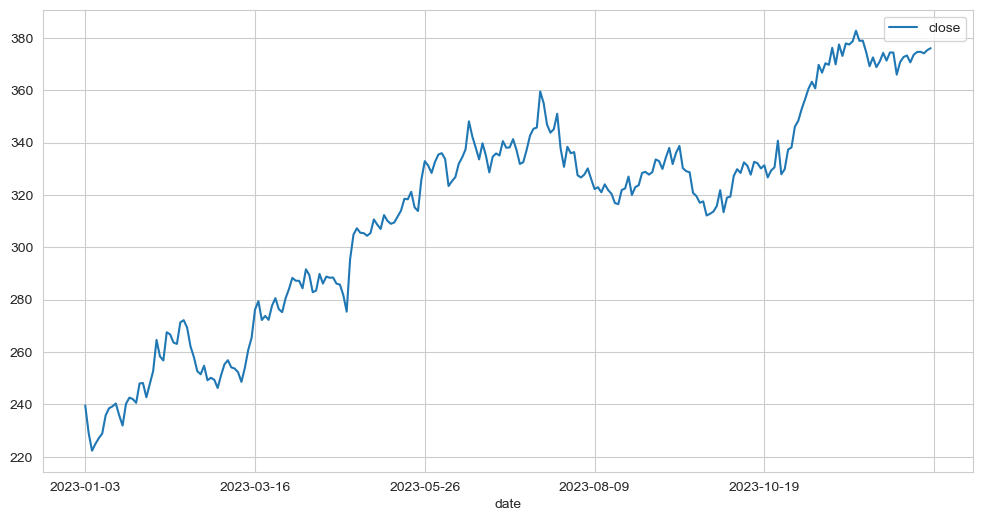

In [82]:
MSFT['close'].plot(legend = True,figsize = (12,6))

<Axes: xlabel='date'>

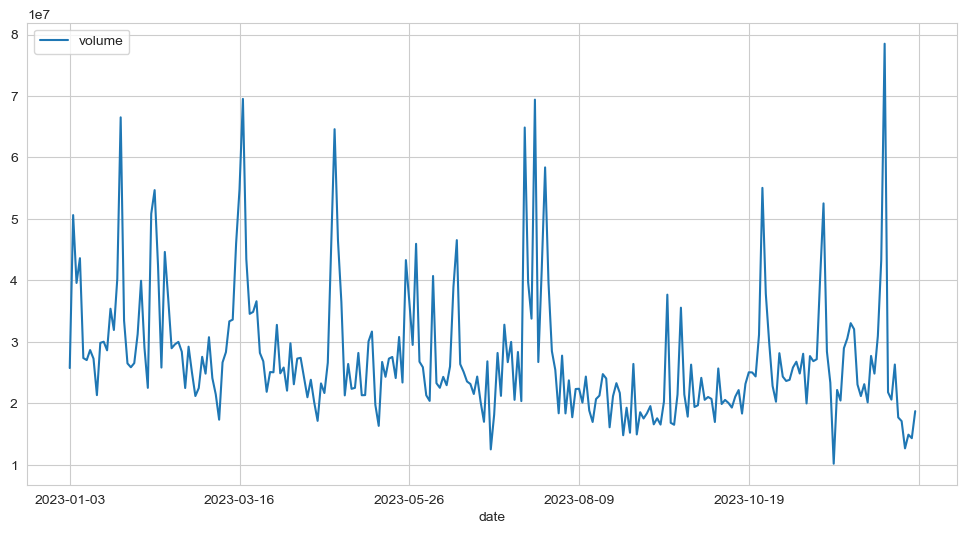

In [83]:
MSFT['volume'].plot(legend = True,figsize = (12,6))

In [84]:
AMZN.head()

,open,high,low,close,volume
date,,,,,
2023-01-03,85.57,86.84,84.23,85.83,64044.0
2023-01-04,86.55,86.98,83.36,85.14,68885123.0
2023-01-05,85.33,85.42,83.07,83.12,67930825.0
2023-01-06,83.03,86.40,81.43,86.08,83303361.0
2023-01-09,87.46,89.48,87.08,87.36,65266056.0


In [85]:
AMZN.describe()

,open,high,low,close,volume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,121.208536,122.764510,119.760206,121.372340,5.600244e+07
std,18.963253,18.907921,18.937628,18.901352,2.182468e+07
min,83.030000,85.420000,81.430000,83.120000,3.520700e+04
25%,101.777500,103.338750,101.035000,102.255000,4.410388e+07
50%,126.705000,128.430000,125.070000,126.830000,5.280383e+07
75%,135.365000,137.330000,134.025000,135.360000,6.492574e+07
max,154.400000,155.630000,153.120000,154.070000,1.531285e+08


<Axes: xlabel='date'>

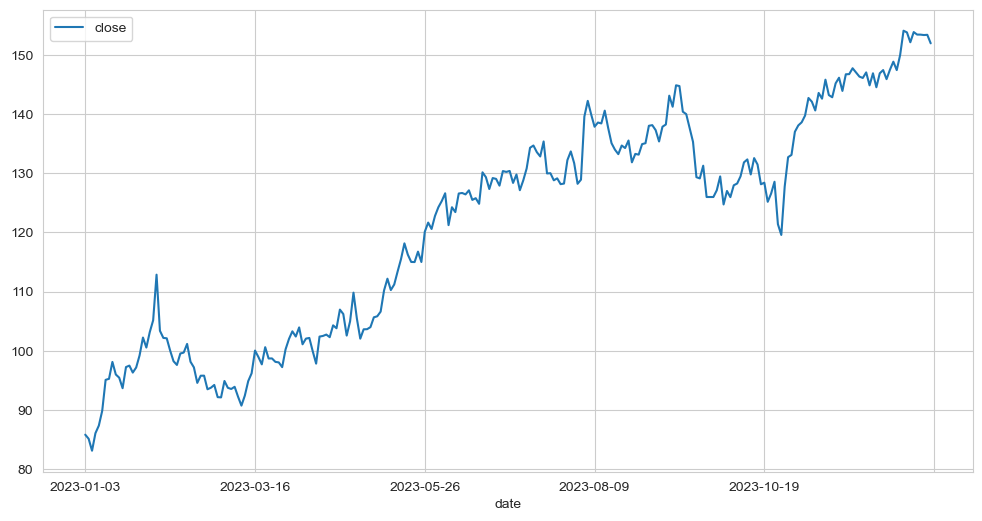

In [86]:
AMZN['close'].plot(legend = True,figsize = (12,6))

<Axes: xlabel='date'>

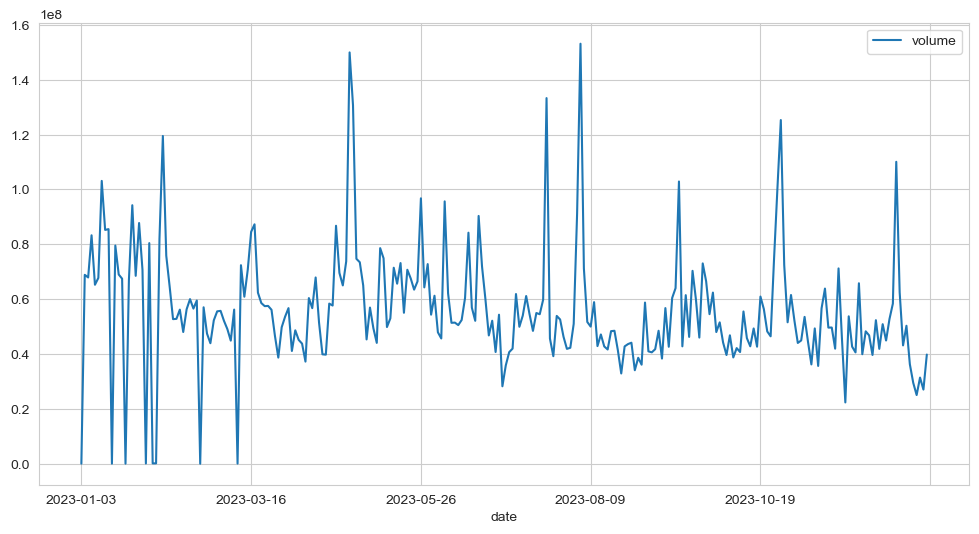

In [87]:
AMZN['volume'].plot(legend = True,figsize = (12,6))

'Moving Average - MA'
A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

In [58]:
ma_day = [10,20,50]

for ma in ma_day:
    col_name = "MA for %s days" %(str(ma))
    AAPL[col_name] = pd.DataFrame.rolling(AAPL['close'],ma).mean()

In [59]:
AAPL.head(50)

,open,high,low,close,volume,MA for 10 days,MA for 20 days,MA for 50 days
date,,,,,,,,
2023-01-03,130.280,130.900,124.170,125.07,112117471,NaN,NaN,NaN
2023-01-04,126.890,128.656,125.080,126.36,89113633,NaN,NaN,NaN
2023-01-05,127.130,127.770,124.760,125.02,80962708,NaN,NaN,NaN
2023-01-06,126.010,130.290,124.890,129.62,87754715,NaN,NaN,NaN
2023-01-09,130.465,133.410,129.890,130.15,70790813,NaN,NaN,NaN
2023-01-10,130.260,131.264,128.120,130.73,63896155,NaN,NaN,NaN
2023-01-11,131.250,133.510,130.460,133.49,69458949,NaN,NaN,NaN
2023-01-12,133.880,134.260,131.440,133.41,71379648,NaN,NaN,NaN
2023-01-13,132.030,134.920,131.660,134.76,57809719,NaN,NaN,NaN


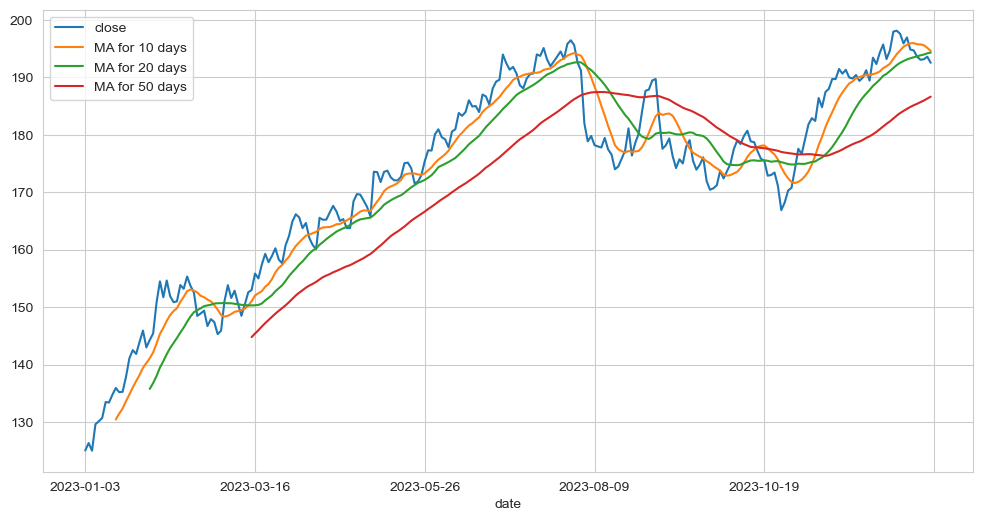

In [60]:
AAPL[['close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots = False,figsize = (12,6))
plt.show()

Daily Return Analysis

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.

In [61]:
AAPL['Daily Return'] = AAPL['close'].pct_change()

In [62]:
AAPL.head()

,open,high,low,close,volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
date,,,,,,,,,
2023-01-03,130.280,130.900,124.17,125.07,112117471,NaN,NaN,NaN,NaN
2023-01-04,126.890,128.656,125.08,126.36,89113633,NaN,NaN,NaN,0.010314
2023-01-05,127.130,127.770,124.76,125.02,80962708,NaN,NaN,NaN,-0.010605
2023-01-06,126.010,130.290,124.89,129.62,87754715,NaN,NaN,NaN,0.036794
2023-01-09,130.465,133.410,129.89,130.15,70790813,NaN,NaN,NaN,0.004089


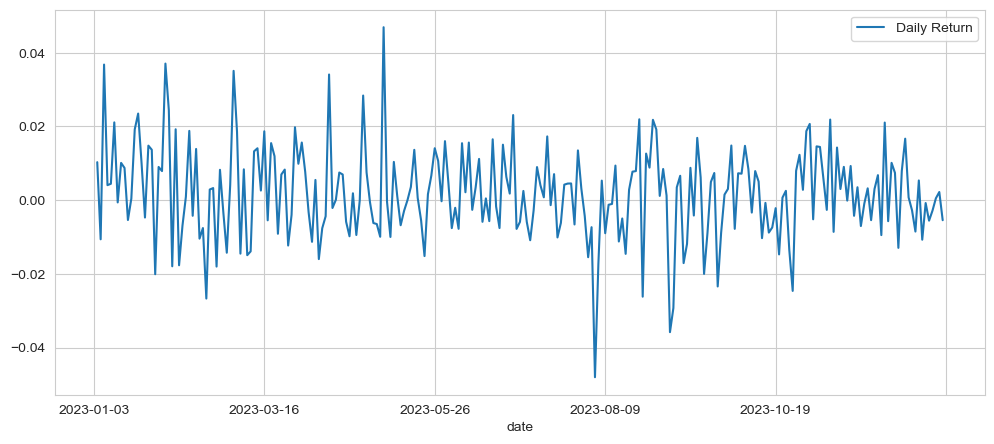

In [63]:
AAPL['Daily Return'].plot(figsize=(12,5),legend = True)
plt.show()

C:\Users\Adin\AppData\Local\Temp\ipykernel_15320\3274116714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(),bins = 100,color='blue')


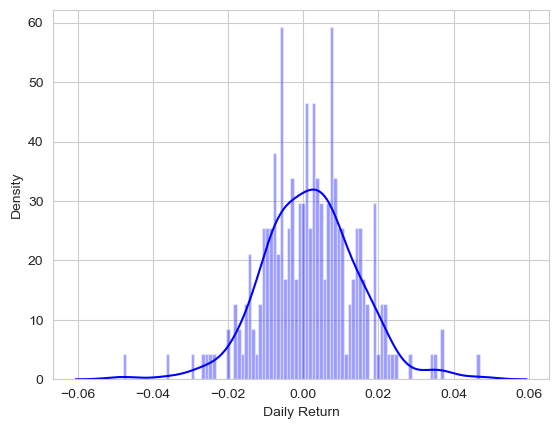

In [64]:
sns.distplot(AAPL['Daily Return'].dropna(),bins = 100,color='blue')
plt.show()

In [88]:
closing_df1 = pd.DataFrame(AAPL['close'])
close1 = closing_df1.rename(columns = {"close": "AAPL_close"})

closing_df2 = pd.DataFrame(GOOG['close'])
close2 = closing_df2.rename(columns = {"close": "GOOG_close"})

closing_df3 = pd.DataFrame(MSFT['close'])
close3 = closing_df3.rename(columns = {"close": "MSFT_close"})

closing_df4 = pd.DataFrame(AMZN['close'])
close4 = closing_df4.rename(columns = {"close": "AMZN_close"})

closing_df = pd.concat([close1,close2,close3,close4],axis = 1)
closing_df.head()

,AAPL_close,GOOG_close,MSFT_close,AMZN_close
date,,,,
2023-01-03,125.07,89.70,239.58,85.83
2023-01-04,126.36,88.71,229.10,85.14
2023-01-05,125.02,86.77,222.31,83.12
2023-01-06,129.62,88.16,224.93,86.08
2023-01-09,130.15,88.80,227.12,87.36


In [89]:
tech_returns = closing_df.pct_change()

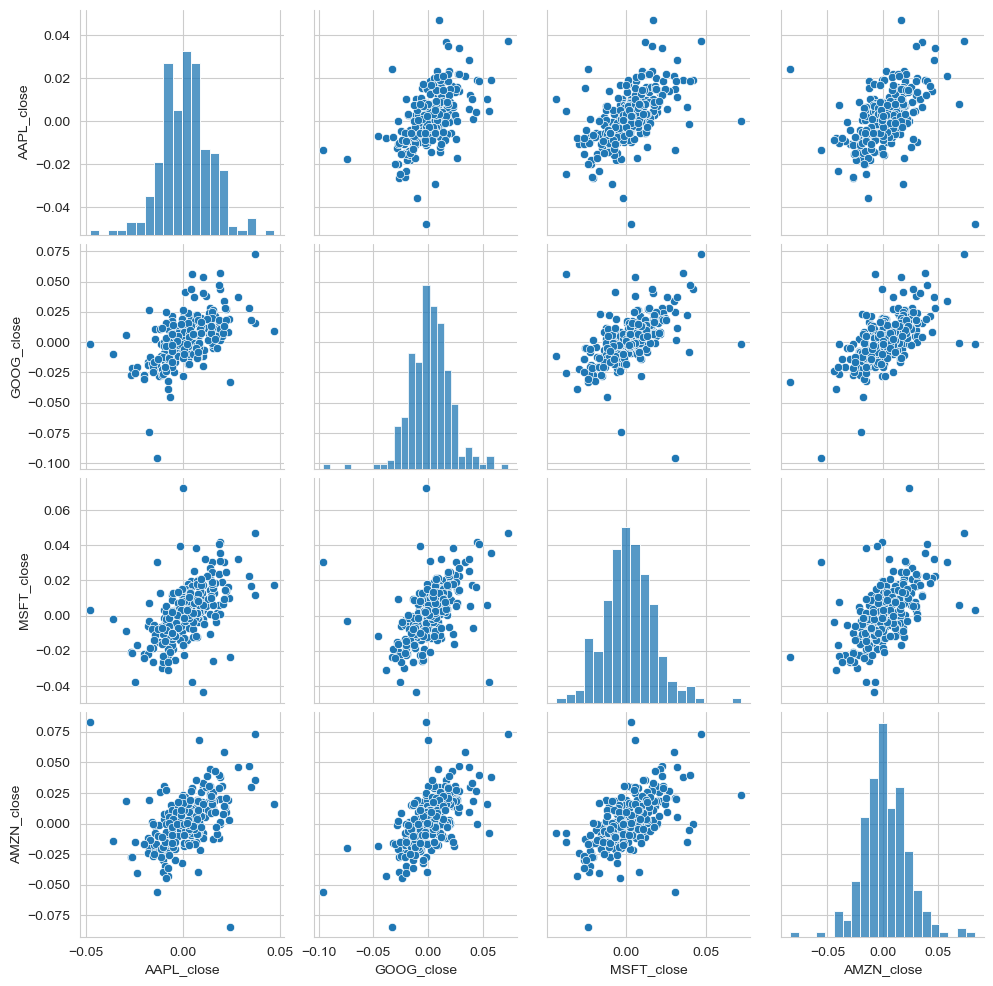

In [92]:
sns.pairplot(tech_returns.dropna())
plt.show()

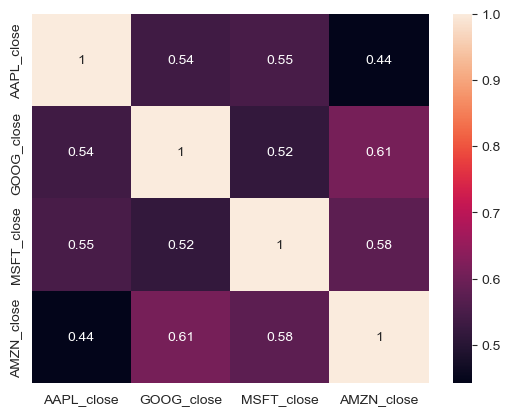

In [93]:
corr = tech_returns.dropna().corr()

sns.heatmap(corr,annot = True)
plt.show()